# Python Packaging (Python Development)

## Tom Davison


<div class="alert alert-block alert-info">

## Learning objectives for today

By the end of this lecture you should be able to:

- Write Python outside Jupyter;
- Explain the similarities & differences between scripts, modules, and packages;
- Apply Python coding standards (PEP8) and use linters;
- Make and install your own Python package.
    
### In summary: 
- **Why** to write reusable code
- **How** to write reusable code
<div>

## The many ways to use Python

Python is used in many ways:
1. Jupyter notebooks (Data Science, Machine Learning, Teaching, Storytelling, Prototyping...)
1. Hacking in the interpreter/IPython console
1. Small, useful scripts
1. Module files: importable code
1. Large, stable packages

We'll look at all of these today

### Jupyter notebooks

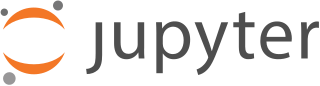

An executable document (`.ipynb`) that consists of multiple cells that can contain:
- Computer code and its output (code cells)
- Human-readable and formattable text, equations, and images (Markdown cells)

### Good points

- Self-consistent and executable document
- Great for exploration, prototyping, and [documenting workflows](https://ieeexplore.ieee.org/document/9325550).
- Used extensively in teaching.
- Popular in data science and machine learning.
- Can run remotely on a more powerful computer (e.g. Google Colab with GPUs, Binder, JupyterHub...).

### Bad points

- Not very good with `git` & version control (as you have probably experienced so far).
- Can run cells out of order.
- Can skip cells.
- Visible output may not match cell contents.
- It is usually good idea to `Kernel` -> `Restart Kernel and Run All Cells`.

In [3]:
# examples
x = 0

In [2]:
x += 1

In [4]:
print(f"X is odd?: {x%2==1}")

X is odd?: False


### The Python interpreter

Type `python` on your command line to start an interactive python session. You should see something like this when it starts:

```
Python 3.12.6 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 02:26:31) [Clang 14.0.6 ] on darwin
Type "help", "copyright", "credits" or "license" for more information.
>>> 
```

Not a user friendly way to run an interactive Python session, but the best supported.
- On many Mac and Linux systems (although sometimes quite old), 
- Very likely to be on network accessible machines.
- Quit with `exit()` or <kbd>Ctrl+D</kbd> (Mac/Linux) or <kbd>Ctrl+Z</kbd> <kbd>Return</kbd> (Windows).

### The IPython console

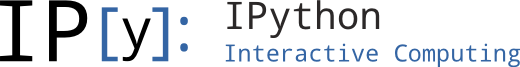

IPython (aka Interactive Python) much more "batteries included"  experience:
- better history editor,
- better tab completions,
- quicker help,
- inline matplotlib support.

IPython interpreter session looks like:
```
Python 3.12.6 | packaged by Anaconda, Inc. | (main, Oct  3 2024, 02:26:31) [Clang 14.0.6 ]
Type 'copyright', 'credits' or 'license' for more information
IPython 8.27.0 -- An enhanced Interactive Python. Type '?' for help.

In [1]:
```
Many features should be familiar from Jupyter notebooks. In fact "under the hood" Jupyter runs IPython (the Python "kernel") to process code.

<div class=alert-info>
    
<h4> Exercise One:</h4>

Run the two sets of commands:
<ul><li>in a Jupyter notebook,</li> <li>in the Python interpreter,</li> 
    <li>in IPython.</li></ul>

Then try to make some modifications.
        
(see <code>Python Packaging (exercises).ipynb</code>)

</div>

## Python Scripts

A Python script is a plain text file containing valid Python code and comments (i.e lines starting `#`), which the Python interpreter transforms into instructions for the computer to perform. 

Script files are written just the same way you'd write Python code in an interactive interpreter, or similar to a notebook. 

You can run a script:
* Through the terminal: `python script.py`
* Inside a Jupyter notebook/IPython:
  * The `!` symbol allows calls out to the operating system shell
    * e.g. `!python script.py`
  * We can also use the `%run` magic statement
    * e.g. `%run script.py`

#### Shebangs

A "shebang line", such as `#!/usr/bin/env python3`, tells Linux/MacOSX this script runs with Python 3. 

On those systems we can turn the script into an executable file (using `chmod`) and then run it directly, without needing to type `python` first:

```bash
$ chmod 755 script.py
$ ./script.py 
```


The file doesn't *have* to be in ASCII. Python default is Unicode  (`utf-8`):
- Compatibility with ASCII.
- Variable-Length Encoding
- Popular international standard.
-  Multilingual Support, access to characters from most world languages.
- Can use letter-like symbols in functions and objects. 
- Efficient Space Usage, Byte Order, etc.

In [5]:
def 你好(x):
    print('Hello', x)

你好('World!')

Hello World!


In [6]:
# Similarly with `utf-8` you can use any Unicode characters you like in comments and strings.
def sorry():
    """😊"""
    return "不好意思, 我不会说中文."

print(sorry())
print(sorry.__doc__)

不好意思, 我不会说中文.
😊


Fortunately, you can't actually use emoji in function names, so code like


```python
def 😊(x):
   return "This doesn't work"
```

will raise a `SyntaxError` exception.

### Writing a Python script

A python script is a text file, you just need a text editor. We'll use [Visual Studio Code](https://code.visualstudio.com):
- cross platform lightweight code editor (maybe an IDE, integrated development environment)
- distributed by Microsoft,
- makes writing, running and understanding Python scripts easier.

Some other IDEs/code editors (multilanguage):
 - [Spyder](https://www.spyder-ide.org/) another IDE which comes bundled with Anaconda Python installations.
 - [Visual Studio](https://visualstudio.com/) (Mostly Windows) Visual Studio Code's big brother. The package also contains Windows compilers for various languages.
 - [Eclipse](https://www.eclipse.org) A cross-platforn open source IDE
(python only):
 - [PyCharm](https://www.jetbrains.com/pycharm/) A Python IDE similar to Spyder.
 - and [many others...](https://en.wikipedia.org/wiki/Comparison_of_integrated_development_environments#Python)
 

Generic text editors with syntax highlighting:
 - Jupyter - as well as notebooks, it can edit plain text files.
 - [Emacs](https://www.gnu.org/software/emacs/) (cross platform) Console/Windowed text editor.
 - [Nano](https://www.nano-editor.org) (cross platform) Console text editor.
 - [Notepad++](https://notepad-plus-plus.org) (Windows only) GUI text editor
 - [Vim](https://www.vim.org) (cross platform) Console text editor. 

 
Your choice  is personal, use what works for you. Don't be afraid to experiment, or carry on using a favourite.

<div class=alert-info>
    
<h4> Exercise Two:</h4>

Using VS Code (or your own preferred editor), write a Python script to output the first 20 prime numbers.
    
See the <code>Python Packaging (exercises).ipynb</code> notebook for some tips.
    
When testing the code, you should expext the output for the first 5 primes to be <code>[2, 3, 5, 7, 11]</code>.

</div>

# *Why* to write scripts?

Some key philosophies in coding:

- DRY: Don't Repeat Yourself (avoid needless code duplication)
- KISS: Keep It Simple/Stupid, 
- YAGNI: You Ain't Gonna Need It - write useful code

Sometimes these compete.

- A good script lets you reuse your code to do one thing (or one sort of thing) with fewer bugs 
  - less code: fewer bugs
- Simplest type of code reuse after copy-pasting (which often ends badly).
- Don't need to write extra code you don't need (typical script has a maximum of one class and possibly a few functions).

An [example script](https://msc-acse.github.io/ACSE-1/lectures/rot13.py), `rot13.py` might look like
```python
#!/usr/bin/env python3

import codecs
import sys

print(codecs.encode(sys.argv[1], 'rot13'))
```

### Option parsing in Python

#### Method 1:  `sys.argv` 
`sys.argv` is an automatic variable in the `sys` module containing a list of the string arguments given when executing the script, with the first variable (`sys.argv[0]`) being the name of the script itself. So in a call


```bash
python myscript.py example text 234
```

```python
sys.argv[0] == "myscript.py"
sys.argv[1] == "example"
sys.argv[2] == "text"
sys.argv[3] == "234"
```

See the example script: `argv_example.py`

```python
import sys

print(f"Number of arguments: {len(sys.argv)}")
print(f"All the arguments: {sys.argv}")
print(f"Script name: {sys.argv[0]}")
```
```python
try:
    print(f"First argument: {sys.argv[1]}")
except IndexError:
    print("No arguments provided")
    exit()
```
```python
try:
    print(f"Second argument: {sys.argv[2]}")
except IndexError:
    print("No second argument provided")
    exit()
```

In [7]:
%run argv_example.py hello 123 test

Number of arguments: 4
All the arguments: ['argv_example.py', 'hello', '123', 'test']
Script name: argv_example.py
First argument: hello
Second argument: 123


Let's go back to `rot13.py`:

This file reads a string from the command line (via `sys.argv[1]`) and applies the ROT-13 cypher, which cycles letters in the Latin alphabet through to the one 13 places forward/backward (i.e. maps A => N, N => A, g => t and so on). This cypher is its own inverse.

In [8]:
# Now we'll run the rot13.py file from your repository
!python rot13.py "Uryyb rirelobql!" 

Hello everybody!


In [9]:
%run rot13.py "Vg'f n frperg!"

It's a secret!


#### Method 2: `argparse` module for argument and options parsing

For more complicated options: the [`argparse` module](https://docs.python.org/3.6/library/argparse.html#module-argparse), in the standard python library. This module gives python scripts the (relatively) simple ability to take flags and process (or parse) other complicated inputs.

A simple example using `argparse`, see `argparse_example.py` in your repository.

First we define the different arguments. They can either be 
- *positional* (required) or 
- *optional* (start with `-` or `--`)

```python
import argparse

parser = argparse.ArgumentParser(description="A minimal argparse example.")
parser.add_argument('name', type=str, help='Your name')
parser.add_argument('-a', '--age', type=int, help='Your age', default=0)

args = parser.parse_args()
```

Then we can use these **arguments** like so:
```python
print(f"Hello, {args.name}!")
if args.age:
    print(f"You are {args.age} years old.")
```


In [10]:
# Let's run the argparse_example.py file from your repository

%run argparse_example.py Ada --age 36
# Alternatively: !python argparse_example.py Ada --age 36

Hello, Ada!
You are 36 years old.


In [11]:
%run argparse_example.py Charles -a 54

Hello, Charles!
You are 54 years old.


<div class=alert-info>
    
<h4>Exercise Three: Find the mean</h4>

<p>Write a script to calculate the mean of a sequence of numbers. 

Using the <code>argparse</code> module to make it take extra options: <code>-b</code>, <code>-o</code> and <code>-x</code> to work with with binary (i.e. base 2, with <code>101 == 5</code> decimal), octal (i.e. base 8, with <code>31 == 25</code> decimal)  and hexadecimal (i.e. base 16 <code>2A == 42</code> decimal) numbers.</p>
</div>

### A reminder on using `matplotlib` in scripts

[*Return to this exercise after Thursday's **Visualisation** lecture if you are having trouble with `matplotlib`*]

In scripts run in the terminal/prompt, rather than in a notebook, `matplotlib` may not automatically put them on screen. You need to use the `matplotlib.show()` or the `pyplot.show()` command to see them.

You can use commands like `matplotlib.savefig('mycoolplot.png')` to write images to disk without human interaction.

<div class="alert-info">

<h4>Exercise Four: Plots in scripts</h4>

- Write a script to plot some math functions </p>

- Change the script to write to disk </p>

</div>

## PEP8 - The Python style guide

Non-ACSII function names & comments are allowed, but Python style guide suggests avoiding them in the standard library. This [style guide](https://www.python.org/dev/peps/pep-0008/), is known as PEP8.

[Python Enhancement Proposals](https://www.python.org/dev/peps/) (PEPs) are mechanism through which Python expands & improves. Suggestions discussed & debated, before being implemented/rejected. PEP8 describes suggestions for good Python code.
Guido van Rossum (Python creator) noted that most code is read more often than it is written. 

Single most important aspect of code is readability.

Note PEP8 doesn't cover every decision. There are more detailed guides:
- at the project level (e.g. see [`numpy`](https://numpydoc.readthedocs.io/en/latest/format.html))
- for entire organizations (e.g. see the [Google Python Style Guide](https://github.com/google/styleguide/blob/gh-pages/pyguide.md))

In your own projects, you're the boss, but PEP8 is a useful minimum (and **will gain/lose you marks during many assessed exercises in this course**). 

It's useful to consider the choices other projects make.

Many tools to perform code linting with python. You have already seen some examples of this with Rhodri in lecture 3 (e.g. `flake8`).

- lightweight `pycodestyle` package, which just checks PEP8.
- `pylint` also performs [static code analysis](https://en.wikipedia.org/wiki/Static_program_analysis).
- `pyflakes` / `flake8`
- `ruff`: modern, fast alternative to many of the tools mentioned above. Also works with Jupyter notebooks.

They examine your code, without actually running it, looking for bad ["code smells"](https://en.wikipedia.org/wiki/Code_smell)/syntax.

Extensions to run many of these tools are offered as [optional](https://code.visualstudio.com/docs/python/linting) when using VS Code to edit Python code.  

Can also select to [use automatic](https://code.visualstudio.com/docs/python/editing#_formatting) `pep8` corrections as you type, and/or run a full `pep8` check each time a document is saved. Both very useful to catch mistakes as you type them.

### Other hints for writing good Python scripts:

 - Explicit is better than implicit.
 - Don't duplicate code, use functions.
 - Keep things small enough to read in one go.
 - Keep variable names meaningful.
 - Simple is often better than clever.
 - Practise the principle of least astonishment.
 - Add comments exactly when they add meaning.

For further discussion, see resources like:
- [Google's Python Style Guide](https://google.github.io/styleguide/pyguide.html),
- the [Hitchhiker's Guide to Python](https://docs.python-guide.org/writing/style/) 
- style guides for large open source python projects such as [Django](https://docs.djangoproject.com/en/dev/internals/contributing/writing-code/coding-style/) or [numpy](https://numpydoc.readthedocs.io/en/latest/format.html)

<div class=alert-info>

<h4> Exercise Five: Fix the script</h4>

Take the example script from exercise 5 in the <code>Python Packaging (exercises).ipynb</code> notebook and fix it to meet the `pep8` standard, using one of the linting tools mentioned above. 
    
If you want more practice, is another example of a script that needs fixing in the repository: <code>bad_pep8.py</code>.

</div>

## Python Modules

- Python modules files contain code you `import` into your scripts and programs. 
- External file from which you are using (or _reusing_) content. 
- In other languages, might be called a library file. 
- A pure Python module file is just like a script, except it expects to be `import`-ed.
- No default output, maybe lots of related functions and classes.

The  code for a (very short) module, `code_mod.py`:

```python
"""Wrapper for rot13 encoding.""" 

import codecs

def rot13(input):
    """Return the rot13 encoding of an input string."""
    return codecs.encode(str(input), 'rot13')
```

In [12]:
import code_mod
code_mod.rot13("Uryyb rirelobql!")

'Hello everybody!'

# _Why_ write modules?

- Often different scripts/programs want to do the same thing.
- Avoid needless code duplication
- Simpler to update
- Simpler to test

### The `import` command

#### The `import` search path

After looking in the current directory, Python uses the other directories inside the `sys.path` variable, in order, when asked to find files via an import command.

In [ ]:
import sys

print(sys.path)

This `sys.path` variable can be changed inside a Python script itself, for example:

In [ ]:
import sys

# Add a new path
sys.path.insert(0, '/some/other/path/')

print(sys.path)

You can also modify this search path before starting your Python session using the `PYTHONPATH` environment variable in your terminal

```bash
export PYTHONPATH=/some/new/path:$PYTHONPATH
```

And then run your script as usual from the terminal.

#### The `importlib.reload` and `%reset` commands.

The python command `reload` in the `importlib` module tells the interpreter to update its record of the contents of an indivual module. This can be useful during an interactive interpreter session if you update a code in a module or package, whether automatically, or by editting the file by hand.

The IPython/Jupyter magic command `%reset` clears elements of the interpreter history and resets things back to their original blank state.

In [13]:
import code_mod

print(code_mod.rot13("Yrg'f erybnq guvf zbqhyr"))

Let's reload this module


In [ ]:
# make some change to code_mod

from importlib import reload
reload(code_mod)

print(code_mod.rot13("Abj jr unir bhe punatrf"))

In [14]:
x = 7
print(x)

7


In [15]:
# by itself, %reset asks the user for confirmation.
# %reset -f forces it to proceed.
%reset -f
try:
    print(x)
except NameError as e:
    print(e)

name 'x' is not defined


## Python docstrings for scripts, modules, and packages.

As you were told in the introduction to Python course, the text between the `"""` blocks is called a docstring. It should appear at the top of scripts and module files, (or just below the shebang line, if one is needed) and as the first text lines inside `classes` or function `def` blocks. Python uses it to generate help information if asked. This information is stored in the object `__doc__` attribute.

In [ ]:
import code_mod

code_mod.rot13?

There is actually a PEP, [PEP257](https://www.python.org/dev/peps/pep-0257/) describing a good docstring. It suggests:
 - One line docstrings should be a full sentence describing the effect
   ```python
   def mod5(a):
       """Return the value of a number modulus 5."""
       return a%5
    ```
 - Multiline docstings should start with a one line summary.
 - The docstring of a pure script should be a "usage" message.
 - The docstring for a module should list the classes and functions (and any other objects) exported by the module, with a one-line summary of each.

 
#### The `numpydoc` standard

`numpy` has its own [standards](https://numpydoc.readthedocs.io/en/latest/), well suited to numerical code, especially `numpy`-based code. You have already seen examples of `numpydoc`, but lets give another. The docstring in the `mandlebrot` function below follows this standard.

It should:

- include a short description of what the function does
- specify the `Parameters` (i.e. the inputs to the function), and if relevant, define the expected `type` for each parameter.
- define the `Returns` (i.e. the values returns from the function), including the `type`


In [16]:
%matplotlib notebook

import copy
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


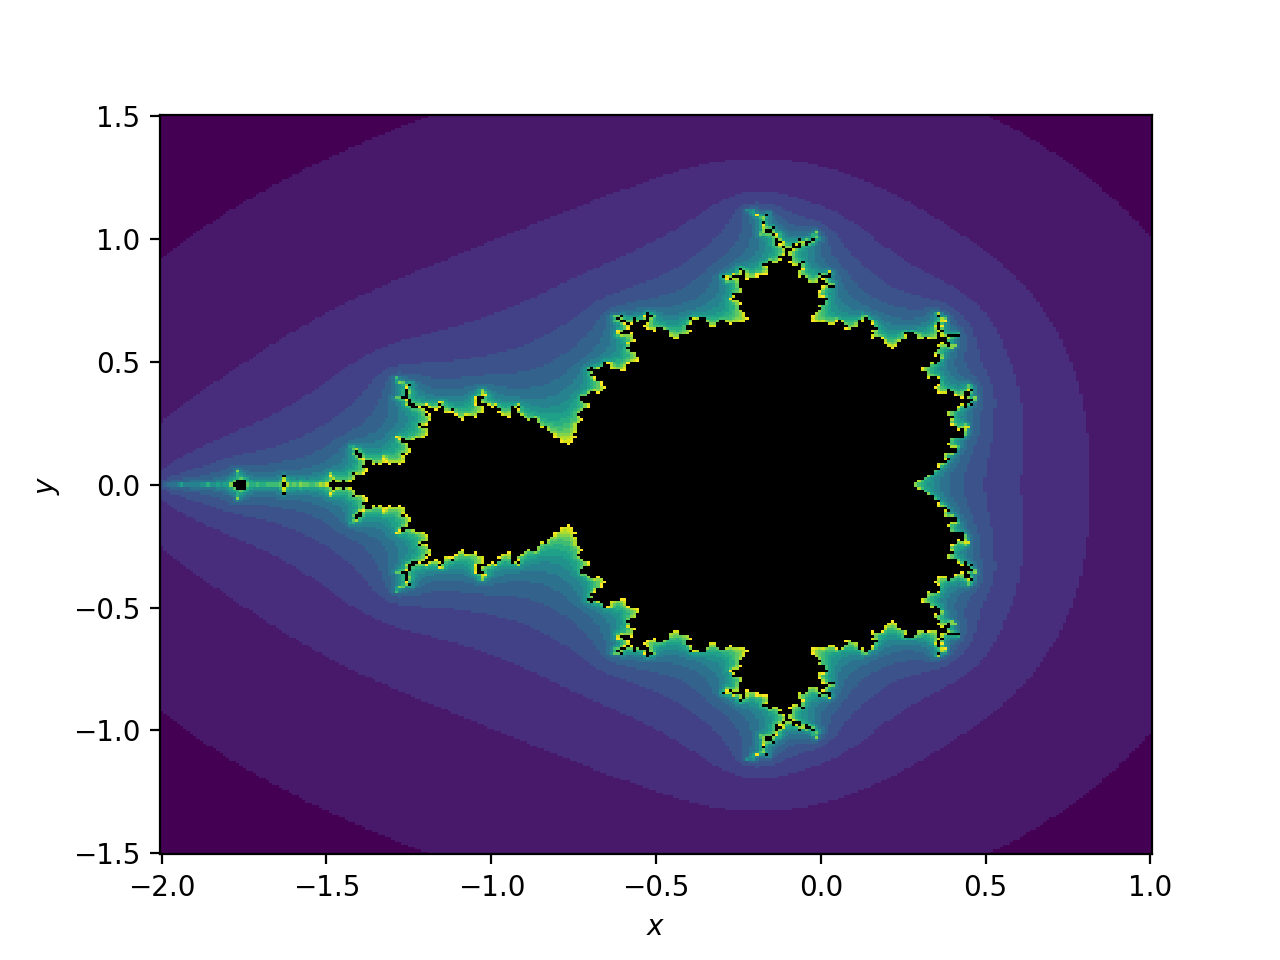

Text(0, 0.5, '$y$')

In [17]:
def mandelbrot(c, a=2.0, n=20):
    """
    Approximate the local Mandelbrot period of a point. 
    
    Parameters
    ----------
    
    c : complex
        Point in the complex plane
    a : float
        A positive bounding length on the horizon of the point z_n
    n : int
        Maximum number of iterations .
    
    Returns
    -------
    
    int
        i such that |z_i|>a if i < n, NaN otherwise.
    
    """
    
    z = c
    for _ in range(n):
        if abs(z)>a:
            return _
        z = z**2 + c
    return np.nan

dx = np.linspace(-2, 1, 300)
dy = np.linspace(-1.5, 1.5, 300)
x, y= np.meshgrid(dx, dy)
z = np.empty(x.shape)

for i in range(len(dx)):
    for j in range(len(dy)):
        z[i, j] = mandelbrot(x[i, j]+1j*y[i, j],100)
    
cmap = plt.get_cmap("viridis")
cmap.set_bad('black')

fig, ax = plt.subplots()
ax.pcolormesh(x, y, z, shading='auto', cmap=cmap)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

In [18]:
mandelbrot.__doc__

'\n    Approximate the local Mandelbrot period of a point. \n    \n    Parameters\n    ----------\n    \n    c : complex\n        Point in the complex plane\n    a : float\n        A positive bounding length on the horizon of the point z_n\n    n : int\n        Maximum number of iterations .\n    \n    Returns\n    -------\n    \n    int\n        i such that |z_i|>a if i < n, NaN otherwise.\n    \n    '

In [19]:
print(mandelbrot.__doc__)


    Approximate the local Mandelbrot period of a point. 
    
    Parameters
    ----------
    
    c : complex
        Point in the complex plane
    a : float
        A positive bounding length on the horizon of the point z_n
    n : int
        Maximum number of iterations .
    
    Returns
    -------
    
    int
        i such that |z_i|>a if i < n, NaN otherwise.
    
    


<div class="alert-info">
    
<h4> Exercise Six: Complex square root</h4>

Write a function which accepts a real number and returns the complex square roots of that number.

Your function should include a docstring conforming to the `numpydoc` standard.</p>

</div>

####  Code Quality

Code quality is a balance between 3 things:
<ul><li> Maintainability: easy & understandable.</li>
    <li> Performance: fast & secure.</li>
<li> Resources: size of the machine & developer time</li></ul>

Frequently a case of "pick two". Compromises are necessary. Important they're recognised &  appropriate. 

<blockquote><emph> Programmers waste enormous amounts of time thinking about, or worrying about, the speed of noncritical parts of their programs, and these attempts at efficiency actually have a strong negative impact when debugging and maintenance are considered. We should forget about small efficiencies, say about 97% of the time: premature optimization is the root of all evil. Yet we should not pass up our opportunities in that critical 3%.</emph></blockquote>

[Donald Knuth](https://en.wikipedia.org/wiki/Donald_Knuth)

If code is going to be read a 2nd time, you can't make it disposable.
- Functions need docstrings
- Variable names must be meaningful

### Combined files (both script and module)

A file can be both a script and a module providing you use a special `if` test to check how it is being used (to avoid being _antisocial_, and doing all the calculating and printing your script is set up to do):

`rot13m.py`:

```python
import codecs

# module definitions

def rot13(input):
    """Return the rot13 encoding of an input"""
    return codecs.encode(str(input), 'rot13')
```
```python
if __name__ == "__main__":
    # Code in this block runs only as a script,
    # not as an import
    import sys
    print(rot13(sys.argv[1]))
```

Although it started as something of a hack, the `if __name__ == "__main__"` idiom is now accepted as fully Pythonic, and is something you will see often in modules which also have sensible script like behaviour.

<div class="alert-info">

<h4> Exercise Seven: A primes module</h4>

Take your prime numbers script from exercise 2, and turn it into a useful module that can either be imported or run as a script
    
Note that there are multiple ways to run a module as a script from the command line:
```bash
python -m rot13m "this runs a python module as a script"
python rot13m.py "so does this"
```

Try running your code, and importing it in an interactive session or notebook, or from another script.
</div>



## Python Packages

### An example package

Python packages bundle multiple modules into one place, to make installing and uninstalling them easier and to simplify usage. A simple python package just consists of python files inside a directory tree.

A typical template for a fairly basic python package called `mycoolproject` might look like:

```bash
mycoolproject
 ├── __init__.py
 ├── cool_module.py
 ├── another_cool_module.py
 └── extras
      ├── __init__.py
      ├── __main__.py
      └── extra_stuff.py
```
```bash
requirements.txt
setup.py
LICENSE
README.md
```

- `__init__.py` file is slightly special (common in Python with double underscore - dunder - names).
- Read when you run `import mycoolproject` (i.e. name of the directory).
- Other files can be imported by themselves as `mycoolproject.cool_module`, `mycoolproject.another_cool_module`, etc.
- `__main__.py` file is module version of `if __name__=='__main__':`, activated if the package is run like `python -m mycoolpackage`

In a typical package the `__init__.py` file mostly consists of `import` commands to load functions and classes from other modules into the main [namespace](https://en.wikipedia.org/wiki/Namespace). May define a few special variables for itself.

*mycoolproject/\_\_init.py\_\_*:
```python
from .cool_module import my_cool_function, my_cool_class
from .another_cool_module.py import *

```

When `import`ing modules, remember that levels of directories are separated using the `.` symbol, so

```python
from mycoolproject.cool_module.extras.extra_stuff import super_cool_function
```

<div class="alert-info">

<h4> Exercise Eight: A primes package</h4>

Turn your "find the primes" module file into a package.

</div>

<div class=alert-warning>
    
#### Information
    
You can also use '.' for _relative_ `import` statements in modules, like in theshell. So, in the example above the file `/mycoolproject/extras/__init__.py` can write:
```python
# one . for the current directory
from  . import extra_stuff
## two ..s for its parent
from .. import another_cool_module
## this also works
from ..coolmodule import foo
```
</div>

## Installation and distribution


- `setup.py` is a standard name for an install script for Python packages.
- Module in Python standard library `distutils`, to automate this.
- We'll use enhanced version called `setuptools`, compatible with `pip`. 

## _setup.py_
```python
from setuptools import setup
```
```python
setup(
    name='mycoolproject',  # Name of package, required
    version='1.0.0',  # Version number, required
    packages=['mycoolproject'],  # directories to install, required
    # One-line description or tagline of what your project does
    description='A sample implementation of quaternions.',  # Optional
    url='https://www.mycoolproject.com',  # Optional
    author='Ada Lovelace Academy Students',  # Optional
    author_email='ada.lovelace.students@imperial.ac.uk',  # Optional
)
```

The `setup.py` script can be called in several modes. For pure Python
```bash
python -m pip install .
```

or

```bash
python -m pip install --user .
```

Notice the `.` at the end of these commands. This is important to tell `pip` to install the package the we are currently in. 

Both commands copy the files in the package into a directory in the standard search path. First installs for everybody on machine (might need admin rights), second installs just for the current user.

### Version Numbers

The `version` in `setup.py` lets you set a version number.
- Many [formats](https://en.wikipedia.org/wiki/Software_versioning). 
  - simple (eg. build 1, build 2, build 3 ...) 
  = to complicated (eg. linux 4.15.0-36-generic),
  - to unusual (eg. [TeX](https://en.wikipedia.org/wiki/TeX) 3.14159265,).
There's even a PEP about it ([PEP440](https://www.python.org/dev/peps/pep-0440/)). 

Good choice is "[semantic versioning](https://semver.org/spec/v2.0.0.html)".
- Ordered set of three integers, separated by dots
- e.g. `0.2.3` or `13.4.2`. 
- (major version).(minor version).(patch version).

Major version increment implies big changes in code, likely incompatiblities. Minor increment means small changes which _might_ cause problems. Patch version implies bug fixes. Common to "backport".

### `pyproject.toml` and modern Python packaging

While `setup.py` has been the traditional way to define package metadata and build configurations, modern Python packaging often recommends using a `pyproject.toml` file. This file provides a standardized way to specify build requirements and metadata. It can be used in place of, or alongside, `setup.py`.

You can read more about using `pyproject.toml` [here](https://packaging.python.org/en/latest/guides/modernize-setup-py-project/). 

For our purposes, `setup.py` is fine, but as you start to look at other projects, you will see `.toml` files, so worth knowing why and how they are used.

### Very brief introduction to `pyproject.toml`

#### `setup.py`
```python
from setuptools import setup

setup(
    name="your_package",
    version="0.1",
    packages=["your_package"],
)
```

#### `pyproject.toml `
```toml
[build-system]
requires = ["setuptools", "wheel"]
build-backend = "setuptools.build_meta"

[project]
name = "your_package"
version = "0.1"
```


### `pip` and `conda` package managers

It's easier to use a tool, called a "package manager", to control installation. Allows for easier installs, uninstalls, and to "sandbox" specific software.

Anaconda comes with two inbuilt package managers, `conda`, specially written for Anaconda itself and `pip`, which is more widely available on non-Anaconda installs. Since `conda` understands (a bit) about `pip`, we'll describe that here.

#### Dependencies

An Python package typically has its own dependecies (i.e. packages which it `import`s). A common way to documents these is a `requirements.txt` file containing a [list of package names](https://pip.pypa.io/en/latest/user_guide/#requirements-files) plus a version number.

_requirements.txt_
```txt
jupyter
numpy >= 1.26.2
scipy == 1.0.0
mpltools
```

Just the name means any version, `>=` demands "greater than or equal to" (where e.g. 2.0.0 > 1.9.1 and 1.2.0 > 1.1.9), `==` demands a specific version.

Packages listed in the `requirements.txt` file can be `pip` installed in one go, via the command:

```bash
pip install -r requirements.txt
```

`conda` accepts similar files in a `.yml`/`.yaml` format (short for "[yet another markup language](https://en.wikipedia.org/wiki/YAML)", or "YAML ain't markup language"). YAML is mostly used for configuration, where data elements mostly consist of named strings and lists.

A `conda` `environment.yml` file looks like

_environment.yml_
```yaml
name: npp2024
dependencies:
 - jupyter
 - numpy
 - scipy
 - pip:
   - mpltools
```

The `pip` subsection deals with packages where there isn't a full `conda` package.

As another route, you can also [include your dependencies](https://python-packaging.readthedocs.io/en/latest/dependencies.html) in your `setup.py` file using the `install_requires` keyword in your `setup` function. 

<div class="alert-info">

<h4> Exercise Nine:</h4>

Make a `setup.py` script for your package
    
</div>
    

### PyPI, the Python Package Index

If you run `python -m pip install <package_name>` (without a `setup.py` or `pyproject.toml`), `pip` scans [PyPI](https://pypi.org), the Python Package Index. This is a very large repository of python software. A good place to check before naming your projects. It also has a [useful tutorial](https://packaging.python.org/tutorials/packaging-projects/) on the packaging process, & points to <https://choosealicense.com/> as a resource for picking licenses. 

Now you know everything you need to be a python package developer. Just add time & creativity.

### Software Licensing

Here's a brief work on software licencing and copyright.

<div class=alert-danger>
    
<h4> Warning</h4>

I am not your lawyer. Lawyers spend a lot of money on insurance, I don't. Don't plan on using these notes as a defence in court.
</div>

#### Licences grant permissions

Copyright holders can grant others the ability to use, copy and distribute their work. The easiest away to do this is to publish a _licence_ together with your code. As a user & developer, ensuring that software you use has a licence with terms compatible with what you intend to do with it prevents long, costly and embarrassing legal action further down the line. Best advice, store a licence file in any repository people can see and copy from, and possibly even add it to the header of your source code.

For computer software (a "literary work"), UK copyright laws allow creators to control the acts of:
- copying, 
- adapting,
- issuing (i.e distributing),
- renting and lending

Could write your own licence, but not safe against lawyers. It is better to use one of the well known and well understood existing copyright licences. If in doubt, the MIT License is popular and well understood.

<div class=alert-warning>
    
#### Copyright periods

| country | UK  | EU  | USA | China | India |
|---      | --- | --- | --- | ---   | ---   |
| copyright period | life+70 | life+70 |  life+70 | life+50 | life+60 |

There are some exceptions to these time periods.
    
</div>

<div class=alert-warning>
    <h4>Copyright is automatic</h4>
Various methods exist to register the date when works were created. Generally no real need to do much (e.g. pushing to Github puts a public date to your work). Your rights exist automatically from the moment of creation , and continue to exist unless you explicitly give them up, or time expires. In some jurisdictions authors are unable to opt out of their moral rights over their work.

</div>


- Since you aren't paid by Universities, students in the UK (even Ph.D students) aren't employees and own their copyrights.
- Work done by staff officially belongs to the University.

When working & writing your own code in you free time, separate the two activities. There are legal cases when people use work-owned resources (e.g. computers) or even [worked on the same topic](https://www.michalsons.com/blog/employer-v-employee-who-owns-that-copyright/1403) while developing their own code.


#### Free/Libre Open Source Software (FLOSS)

English word "free" in English has  meanings
1. Without cost : "Buy one, get one free!"
2. Unrestrained : "They set the prisoners free."

The free software movement is aimed at encouraging software to be distributed under terms matching the second meaning. 

##### Stallman's four freedoms:

- _Freedom 0_ The freedom to run the program, for any purpose.
- _Freedom 1_ The freedom to study how the program works, and change it so it does your computing as you wish. (Access to the source code is a precondition for this.)
- _Freedom 2_ The freedom to redistribute copies so you can help your neighbor.
- _Freedom 3_ The freedom to distribute copies of your modiﬁed versions to others. By doing this you can give the whole community a chance to beneﬁt from your changes. (Access to the source code is a precondition for this.)

#### The public domain

The "most free" option to release work into the public domain. This "gives up" your copyright.

Since some legal systems (particularly in the EU) can make it practically impossible for authors to give up their "moral rights".

#### Permissive licences versus "copyleft"

Many licences, while retaining copyright, otherwise give users unrestricted rights to copy, modify & distribute code. In particular, they allow code to be used as part of greater works released under more restrictive licences. These are often called "permissive" licences.

Other licences (e.g. the [GNU General Public License](https://www.gnu.org/licenses/quick-guide-gplv3.html) intend to ensure that once software is released as "free software, it stays as "free software". They place restrictions on the immediate recipient of the work, to ensure that people later down the chain retain their version of the four freedoms.

- the freedom to use the software for any purpose,
- the freedom to change the software to suit your needs,
- the freedom to share the software with your friends and neighbors, and
- the freedom to share the changes you make.

Specifically, versions of the GPL all require modified versions of GPL'd projects are distributed a GPL licence (e.g. they must also release the source code on demand, & allow other users the right to modify and distribute it). Oftern called "copyleft" .

#### Licence compatibility

Because "copyleft" licences require derivative works to also be released under suitable "copyleft" licences, it is impossible to release packages containing GPL components entirely under more permissive licences such as BSD.


|Licence| BSD/MIT | LGPL | GPL |
|-----|-----|------|-----|
| BSD/MIT | Yes | No   | No  |
| LGPL| Yes | Yes  | No  |
| GPL | Yes | Yes  | Yes |

#### Commercial rights

- Some licences allow non-commercial use, with the right reserved to charge a fee for commercial use.
- "Commercial use" is interpreted as related to income-generating use of any kind, whether direct or indirect.
- Shouldn't use a non-commercial license a way that earns (significant) money. 

Fortunately, academic study & pure research uses are often specifically excluded as non-commercial activities. Many companies (including Imperial College London) have lawyers on retainer to deal with intellectual property questions.



## Further Reading:

- [PEP8](https://www.python.org/dev/peps/pep-0008/), the Python style guide
- The [Google Python Style Guide]()
- A [tutorial]() for the Visual Studio Code IDE
- The python documentation page on [modules & packages](https://docs.python.org/3.6/tutorial/modules.html).
- [PEP257](https://www.python.org/dev/peps/pep-0257/#specification) - docstring conventions.
- The `numpydoc` [docstring standard](https://numpydoc.readthedocs.io/en/latest/)


<div class="alert alert-block alert-info">

## Summary

Tody we learned:
    
- How to write Python outside Jupyter;
- The similarities & differences between python scripts, modules, and packages;
- How to apply Python coding standards (PEP8) and use linters;
- How to make and install your own Python package.